# Python TFM Section

## Modelling
1. Compare several models and use the most suitable for this case of study
2. Train and Test the final model and set it up implemented
3. Final conclusions

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pathlib import Path
import sklearn

In [64]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,Res. Pot. Adicional,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH
0,201701,UPR115,NC,NaN,NaN,NaN,NaN,NaN,NaN,81778497.0,...,NaN,NaN,-36.0,-197055.0,NaN,NaN,NaN,NaN,NaN,1111803.766
1,201701,UPR116,NC,NaN,NaN,NaN,NaN,NaN,NaN,68455391.0,...,NaN,NaN,NaN,-308245.0,NaN,NaN,NaN,NaN,NaN,940091.558
2,201701,UPR1198,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-192.0,NaN,NaN,NaN,NaN,NaN,NaN,-1418.032
3,201701,UPR1205,EB,NaN,NaN,NaN,-124366.0,NaN,NaN,1578792.0,...,NaN,NaN,-455.0,NaN,-33711.0,NaN,55144.0,NaN,NaN,22830.702
4,201701,UPR1206,BX,NaN,NaN,NaN,-9972.0,NaN,NaN,NaN,...,NaN,NaN,-7.0,NaN,-16346.0,NaN,NaN,NaN,NaN,-418.593


Before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_MARGIN with the sum of all the euros 
3. I will inspect the graphical aspect of the data
4. After watching it, I decided to drop all the outliers of every column and watch it again

In [65]:
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_MARGIN']  = \
df_modelize['A. No Cobrados'] + \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['Ajuste'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['Banda'] + \
df_modelize['Bilateral'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['D. Medida Contador'] + \
df_modelize['G. Desvios'] + \
df_modelize['G. Potencia LP'] + \
df_modelize['G. Potencia MP'] + \
df_modelize['I. G. DesvÃ­os y Terciaria'] + \
df_modelize['I. R. Cobertura'] +  \
df_modelize['I. Res. Pot. Adicional'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['M. Diario'] + \
df_modelize['M. Intradiario Continuo'] + \
df_modelize['M. Intradiarios'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['R. Cobertura'] + \
df_modelize['R. Secundaria'] + \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['Redespachos'] + \
df_modelize['Res. Pot. Adicional'] +  \
df_modelize['S. Regulacion'] + \
df_modelize['S. Res. Pot. Adicional'] + \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] + \
df_modelize['Terciaria'] + \
df_modelize['VCF'] 

df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH,INTEGRAL_MARGIN
0,201701,UPR115,NC,0.0,0.0,0.0,0.0,0.0,0.0,81778497.0,...,0.0,-36.0,-197055.0,0.0,0.0,0.0,0.0,0.0,1111803.766,73950395.0
1,201701,UPR116,NC,0.0,0.0,0.0,0.0,0.0,0.0,68455391.0,...,0.0,0.0,-308245.0,0.0,0.0,0.0,0.0,0.0,940091.558,61378103.0
2,201701,UPR1198,NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-192.0,0.0,0.0,0.0,0.0,0.0,0.0,-1418.032,-35497.0
3,201701,UPR1205,EB,0.0,0.0,0.0,-124366.0,0.0,0.0,1578792.0,...,0.0,-455.0,0.0,-33711.0,0.0,55144.0,0.0,0.0,22830.702,1628652.0
4,201701,UPR1206,BX,0.0,0.0,0.0,-9972.0,0.0,0.0,0.0,...,0.0,-7.0,0.0,-16346.0,0.0,0.0,0.0,0.0,-418.593,-40860.0


First, I proceed to separate the data frame into Train-Test parts

For that, I divide the original df into two parts with the inputs on the matrix X and the  outputs desired on the matrix y

In [128]:
df_modelize2 = df_modelize[['ID_TECNOLOGIA','POWER_MWH','INTEGRAL_MARGIN']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize2 = df_modelize2[['POWER_MWH','INTEGRAL_MARGIN','NUM_TECH']]


df_modelize2.sort_values('INTEGRAL_MARGIN').tail(5)

,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
872,25252754.63,1.790695e+09,1
1000,30433835.04,1.856555e+09,1
828,29264447.52,1.863655e+09,1
913,32620485.17,2.107742e+09,1
871,29867406.09,2.113814e+09,1


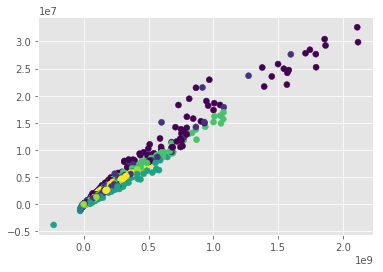

In [129]:
plt.scatter(df_modelize2['INTEGRAL_MARGIN'],df_modelize2['POWER_MWH'],c=df_modelize2['NUM_TECH'])

I discard the outliers which are bigger than 2 times the standard desviation, that means keeping the percentile 95 of every data.

I used directly the fuction zcore from stats to have the calcule directly instead of using the mean and the standard deviation.

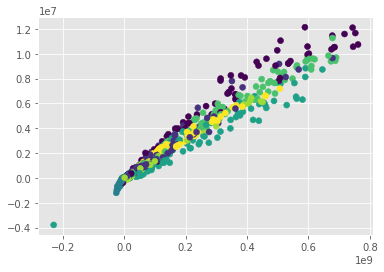

In [138]:
from scipy import stats
df_modelize3= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

There are still some values too low that I don't want to take into account , so I will drop it manually

In [141]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
761,784,-3789073.00,-230711843.0,5
610,623,-1206169.48,-26556006.0,4
650,666,-968546.08,-24686687.0,4


In [147]:
df_modelize3=df_modelize3.drop(df_modelize3.index[761])

In [148]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
610,623,-1206169.480,-26556006.0,4
650,666,-968546.080,-24686687.0,4
509,513,-682677.543,-23179375.0,4


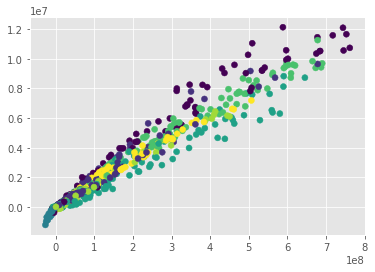

In [149]:
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])